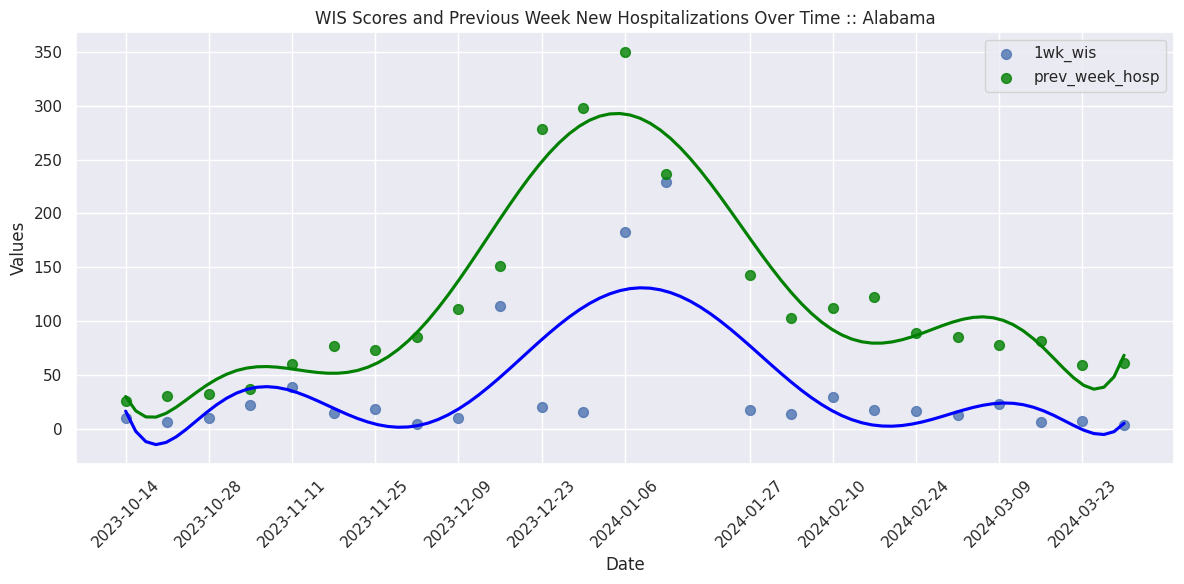

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hosp_roc/01.csv")

df["date"] = pd.to_datetime(df["date"])

# Convert dates to numeric values for regression
df["date_num"] = (df["date"] - df["date"].min()).dt.days

# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Plot 1wk_wis with polynomial regression
sns.regplot(
    x="date_num",
    y="1wk_WIS",
    data=df,
    order=8,
    label="1wk_wis",
    scatter_kws={"s": 50},
    line_kws={"color": "blue"},
    ci=None,
)

# Plot prev_week_hosp with polynomial regression
sns.regplot(
    x="date_num",
    y="prev_week_hosp",
    data=df,
    order=8,
    label="prev_week_hosp",
    scatter_kws={"s": 50, "color": "green"},
    line_kws={"color": "green"},
    ci=None,
)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("WIS Scores and Previous Week New Hospitalizations Over Time :: " "Alabama")
plt.legend()

# Customize the x-ticks to show dates
plt.xticks(
    ticks=df["date_num"][::2],
    labels=df["date"].dt.strftime("%Y-%m-%d")[::2],
    rotation=45,
)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
import glob
import numpy as np


def aggregate_csv_files(directory_path):
    all_files = glob.glob(f"{directory_path}/*.csv")
    df_list = []

    for file in all_files:
        df = pd.read_csv(file)
        df_list.append(df)

    # Concatenate all DataFrames
    combined_df = pd.concat(df_list, ignore_index=True)

    # Drop rows with NaN or infinite values
    combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    combined_df.dropna(inplace=True)

    # Select the necessary columns
    aggregated_df = combined_df[["date", "1wk_WIS", "prev_week_hosp"]]

    return aggregated_df


directory_path = "./hosp_roc"
aggregated_data = aggregate_csv_files(directory_path)
aggregated_data.head(30)

,date,1wk_WIS,prev_week_hosp
0,2023-10-14,6.80,23.0
1,2023-10-21,13.51,25.0
2,2023-10-28,19.51,33.0
3,2023-11-04,6.51,39.0
4,2023-11-11,45.84,47.0
5,2023-11-18,11.54,87.0
6,2023-11-25,37.36,84.0
7,2023-12-02,9.01,138.0
8,2023-12-09,6.52,146.0
9,2023-12-16,15.34,207.0


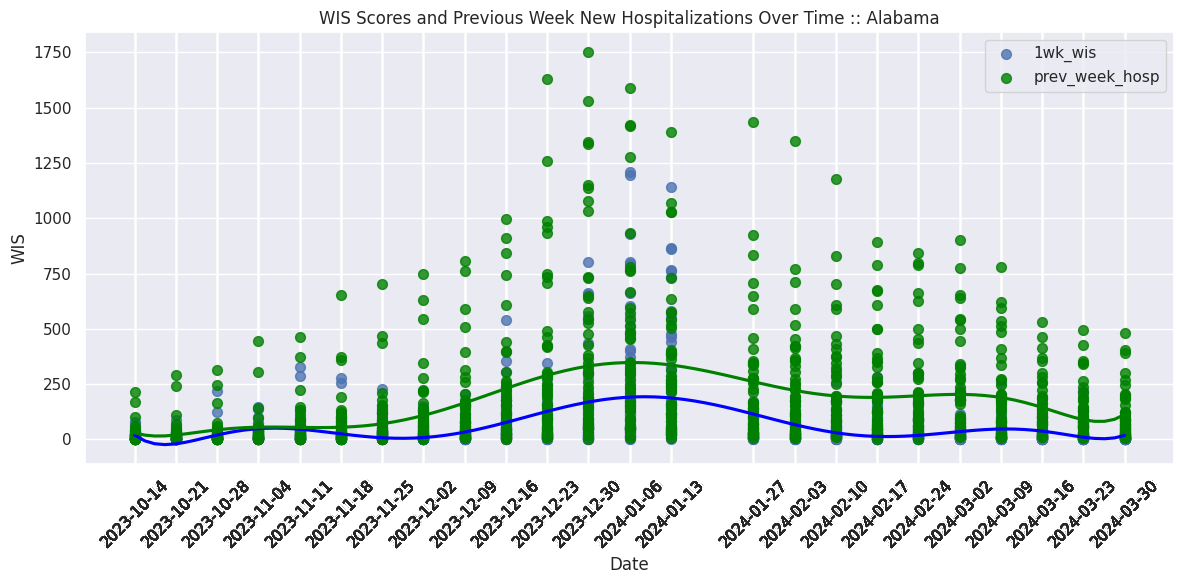

In [37]:
df = aggregated_data

df["date"] = pd.to_datetime(df["date"])

# Convert dates to numeric values for regression
df["date_num"] = (df["date"] - df["date"].min()).dt.days

# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Plot 1wk_wis with polynomial regression
sns.regplot(
    x="date_num",
    y="1wk_WIS",
    data=df,
    order=8,
    label="1wk_wis",
    scatter_kws={"s": 50},
    line_kws={"color": "blue"},
    ci=None,
)

# Plot prev_week_hosp with polynomial regression
sns.regplot(
    x="date_num",
    y="prev_week_hosp",
    data=df,
    order=8,
    label="prev_week_hosp",
    scatter_kws={"s": 50, "color": "green"},
    line_kws={"color": "green"},
    ci=None,
)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("WIS")
plt.title("WIS Scores and Previous Week New Hospitalizations Over Time :: " "Alabama")
plt.legend()

# Customize the x-ticks to show dates
plt.xticks(
    ticks=df["date_num"][::2],
    labels=df["date"].dt.strftime("%Y-%m-%d")[::2],
    rotation=45,
)

# Show the plot
plt.tight_layout()
plt.show()

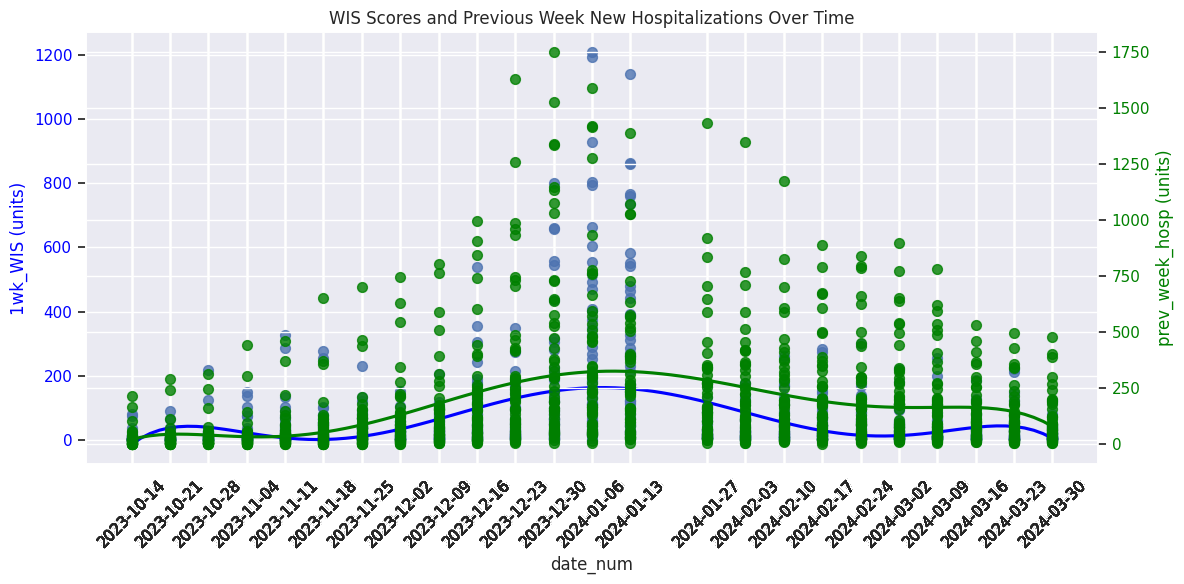

In [42]:
df = aggregated_data

# Assuming df is already your aggregated data and date is converted to datetime
df["date_num"] = (df["date"] - df["date"].min()).dt.days

# Initialize the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1wk_wis with polynomial regression on primary y-axis
sns.regplot(
    x="date_num",
    y="1wk_WIS",
    data=df,
    order=6,
    ax=ax1,
    scatter_kws={"s": 50},
    line_kws={"color": "blue"},
    ci=None,
)
ax1.set_ylabel("1wk_WIS (units)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.regplot(
    x="date_num",
    y="prev_week_hosp",
    data=df,
    order=6,
    ax=ax2,
    scatter_kws={"s": 50, "color": "green"},
    line_kws={"color": "green"},
    ci=None,
)
ax2.set_ylabel("prev_week_hosp (units)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Customize the x-ticks to show dates
ax1.set_xticks(df["date_num"][::2])
ax1.set_xticklabels(df["date"].dt.strftime("%Y-%m-%d")[::2], rotation=45)

plt.title("WIS Scores and Previous Week New Hospitalizations Over Time")
fig.tight_layout()
plt.show()